In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from PIL import Image
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
%matplotlib inline

### Figure 1a: Global Micro-Estimates of Wealth and Poverty

In [2]:
rwi_z14 = pd.read_csv('data/rwi_zoom_14.csv', header=None, delimiter='\t')
rwi_z14.columns = ['x', 'y', 'rwi']
print('rwi_z14')
print(rwi_z14.shape)

rwi_in_SouthAfrica_Lesotho = pd.read_csv('data/rwi_in_SouthAfrica_Lesotho.csv')
print('rwi_z14_SouthAfrica_Lesotho')
print(rwi_in_SouthAfrica_Lesotho.shape)

awe_z14 = pd.read_csv('data/awe_zoom_14.csv', header=None, delimiter='\t')
awe_z14.columns = ['x', 'y', 'awe']
awe_z14['awe_sqrt'] = awe_z14['awe'] ** .5
print('awe_z14')
print(awe_z14.shape)

all_tiles_z14 = pd.read_csv('data/all_tiles_zoom_14.csv', delimiter='\t', header=None, na_filter = False)
all_tiles_z14.columns = ['iso2', 'x', 'y']
print('all_tiles_z14')
print(all_tiles_z14.shape)

rwi_z14
(18732526, 3)
rwi_z14_SouthAfrica_Lesotho
(1104515, 3)
awe_z14
(18732526, 4)
all_tiles_z14
(103627150, 3)


In [3]:
x_max, x_min = np.max(all_tiles_z14['x']), np.min(all_tiles_z14['x'])
y_max, y_min = np.max(all_tiles_z14['y']), np.min(all_tiles_z14['y'])
print(x_max, x_min)
print(y_max, y_min)

M, N = x_max - x_min + 1, y_max - y_min + 1
rwi_2plot_global_z14 = np.empty((N, M,))
rwi_2plot_global_z14[:] = np.NAN

background_gray_global_z14 = np.empty((N, M,))
background_gray_global_z14[:] = np.NAN

for x, y in zip(all_tiles_z14['x'], 
                all_tiles_z14['y']):
    background_gray_global_z14[y-y_min, x-x_min] = 0
    
for x, y, val in zip(rwi_z14['x'], 
                     rwi_z14['y'], 
                     rwi_z14['rwi']):
    rwi_2plot_global_z14[y-y_min, x-x_min] = val

awe_2plot_global_z14 = np.empty((N, M,))
awe_2plot_global_z14[:] = np.NAN

awe_sqrt_2plot_global_z14 = np.empty((N, M,))
awe_sqrt_2plot_global_z14[:] = np.NAN

for x, y, awe, awe_sqrt in zip(awe_z14['x'], 
                               awe_z14['y'], 
                               awe_z14['awe'],
                               awe_z14['awe_sqrt']):
    awe_2plot_global_z14[y-y_min, x-x_min] = awe
    awe_sqrt_2plot_global_z14[y-y_min, x-x_min] = awe_sqrt

16383 0
16383 660


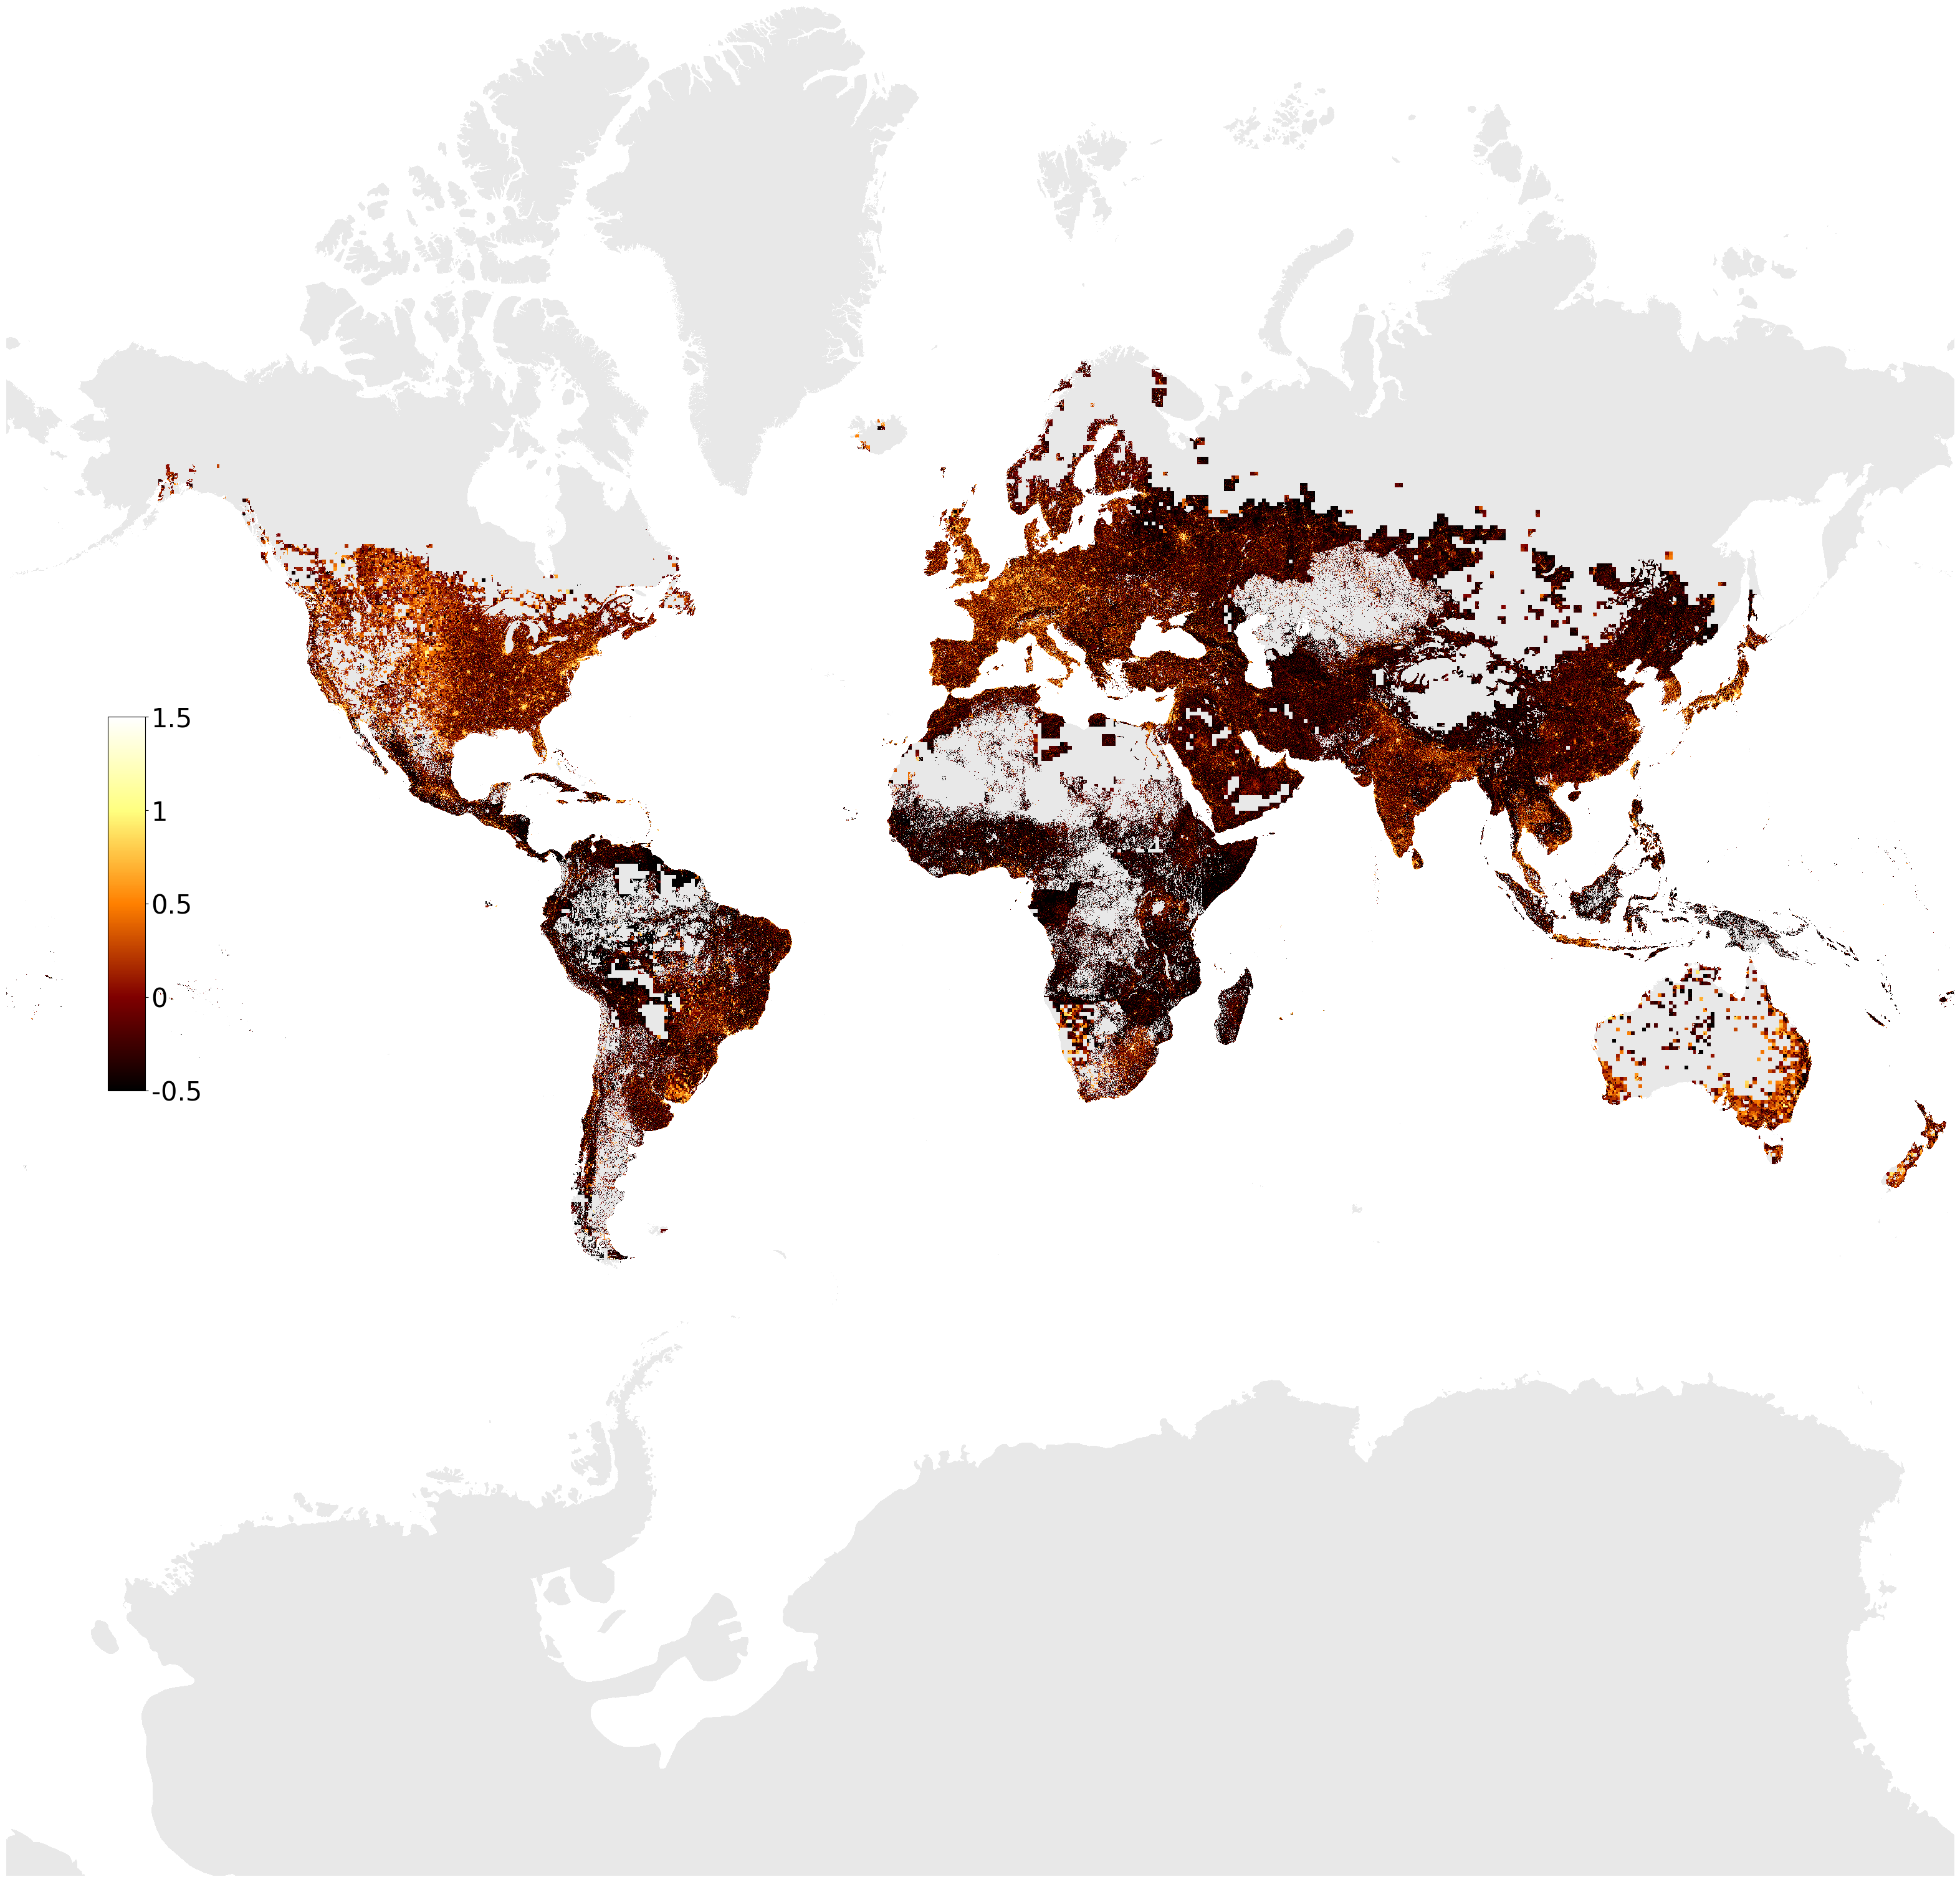

In [4]:
plt.style.use('default')
fig = plt.figure(figsize=(40, 30))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_facecolor('white')
ax.axis('off')
a = ax.imshow(background_gray_global_z14, cmap='gray', vmin=-10, vmax=1)
b = ax.imshow(rwi_2plot_global_z14, cmap='afmhot', vmin=-.5, vmax=1.5)
cbaxes = fig.add_axes([0.15, 0.42, 0.015, 0.2])
cb = plt.colorbar(b, cax = cbaxes)
cb.set_ticks([-0.5, 0, 0.5, 1, 1.5])
cb.set_ticklabels(['-0.5', '0', '0.5', '1', '1.5'])
cb.ax.tick_params(labelsize=30)
plt.savefig('figure/rwi_global.png', dpi=300)

### Figure 1b: South Africa and Lesotho

In [5]:
x_max, x_min = np.max(rwi_in_SouthAfrica_Lesotho['x']), np.min(rwi_in_SouthAfrica_Lesotho['x'])
y_max, y_min = np.max(rwi_in_SouthAfrica_Lesotho['y']), np.min(rwi_in_SouthAfrica_Lesotho['y'])
print(x_max, x_min)
print(y_max, y_min)

M, N = x_max - x_min + 1, y_max - y_min + 1
rwi_2plot_SouthAfrica_Lesotho = np.empty((N, M,))
rwi_2plot_SouthAfrica_Lesotho[:] = np.NAN
background_gray_SouthAfrica_Lesotho = np.empty((N, M,))
background_gray_SouthAfrica_Lesotho[:] = np.NAN

for x, y, val in zip(rwi_in_SouthAfrica_Lesotho['x'], 
                     rwi_in_SouthAfrica_Lesotho['y'], 
                     rwi_in_SouthAfrica_Lesotho['rwi']):
    rwi_2plot_SouthAfrica_Lesotho[y-y_min, x-x_min] = val
    background_gray_SouthAfrica_Lesotho[y-y_min, x-x_min] = 0

19377 17881
19770 18450


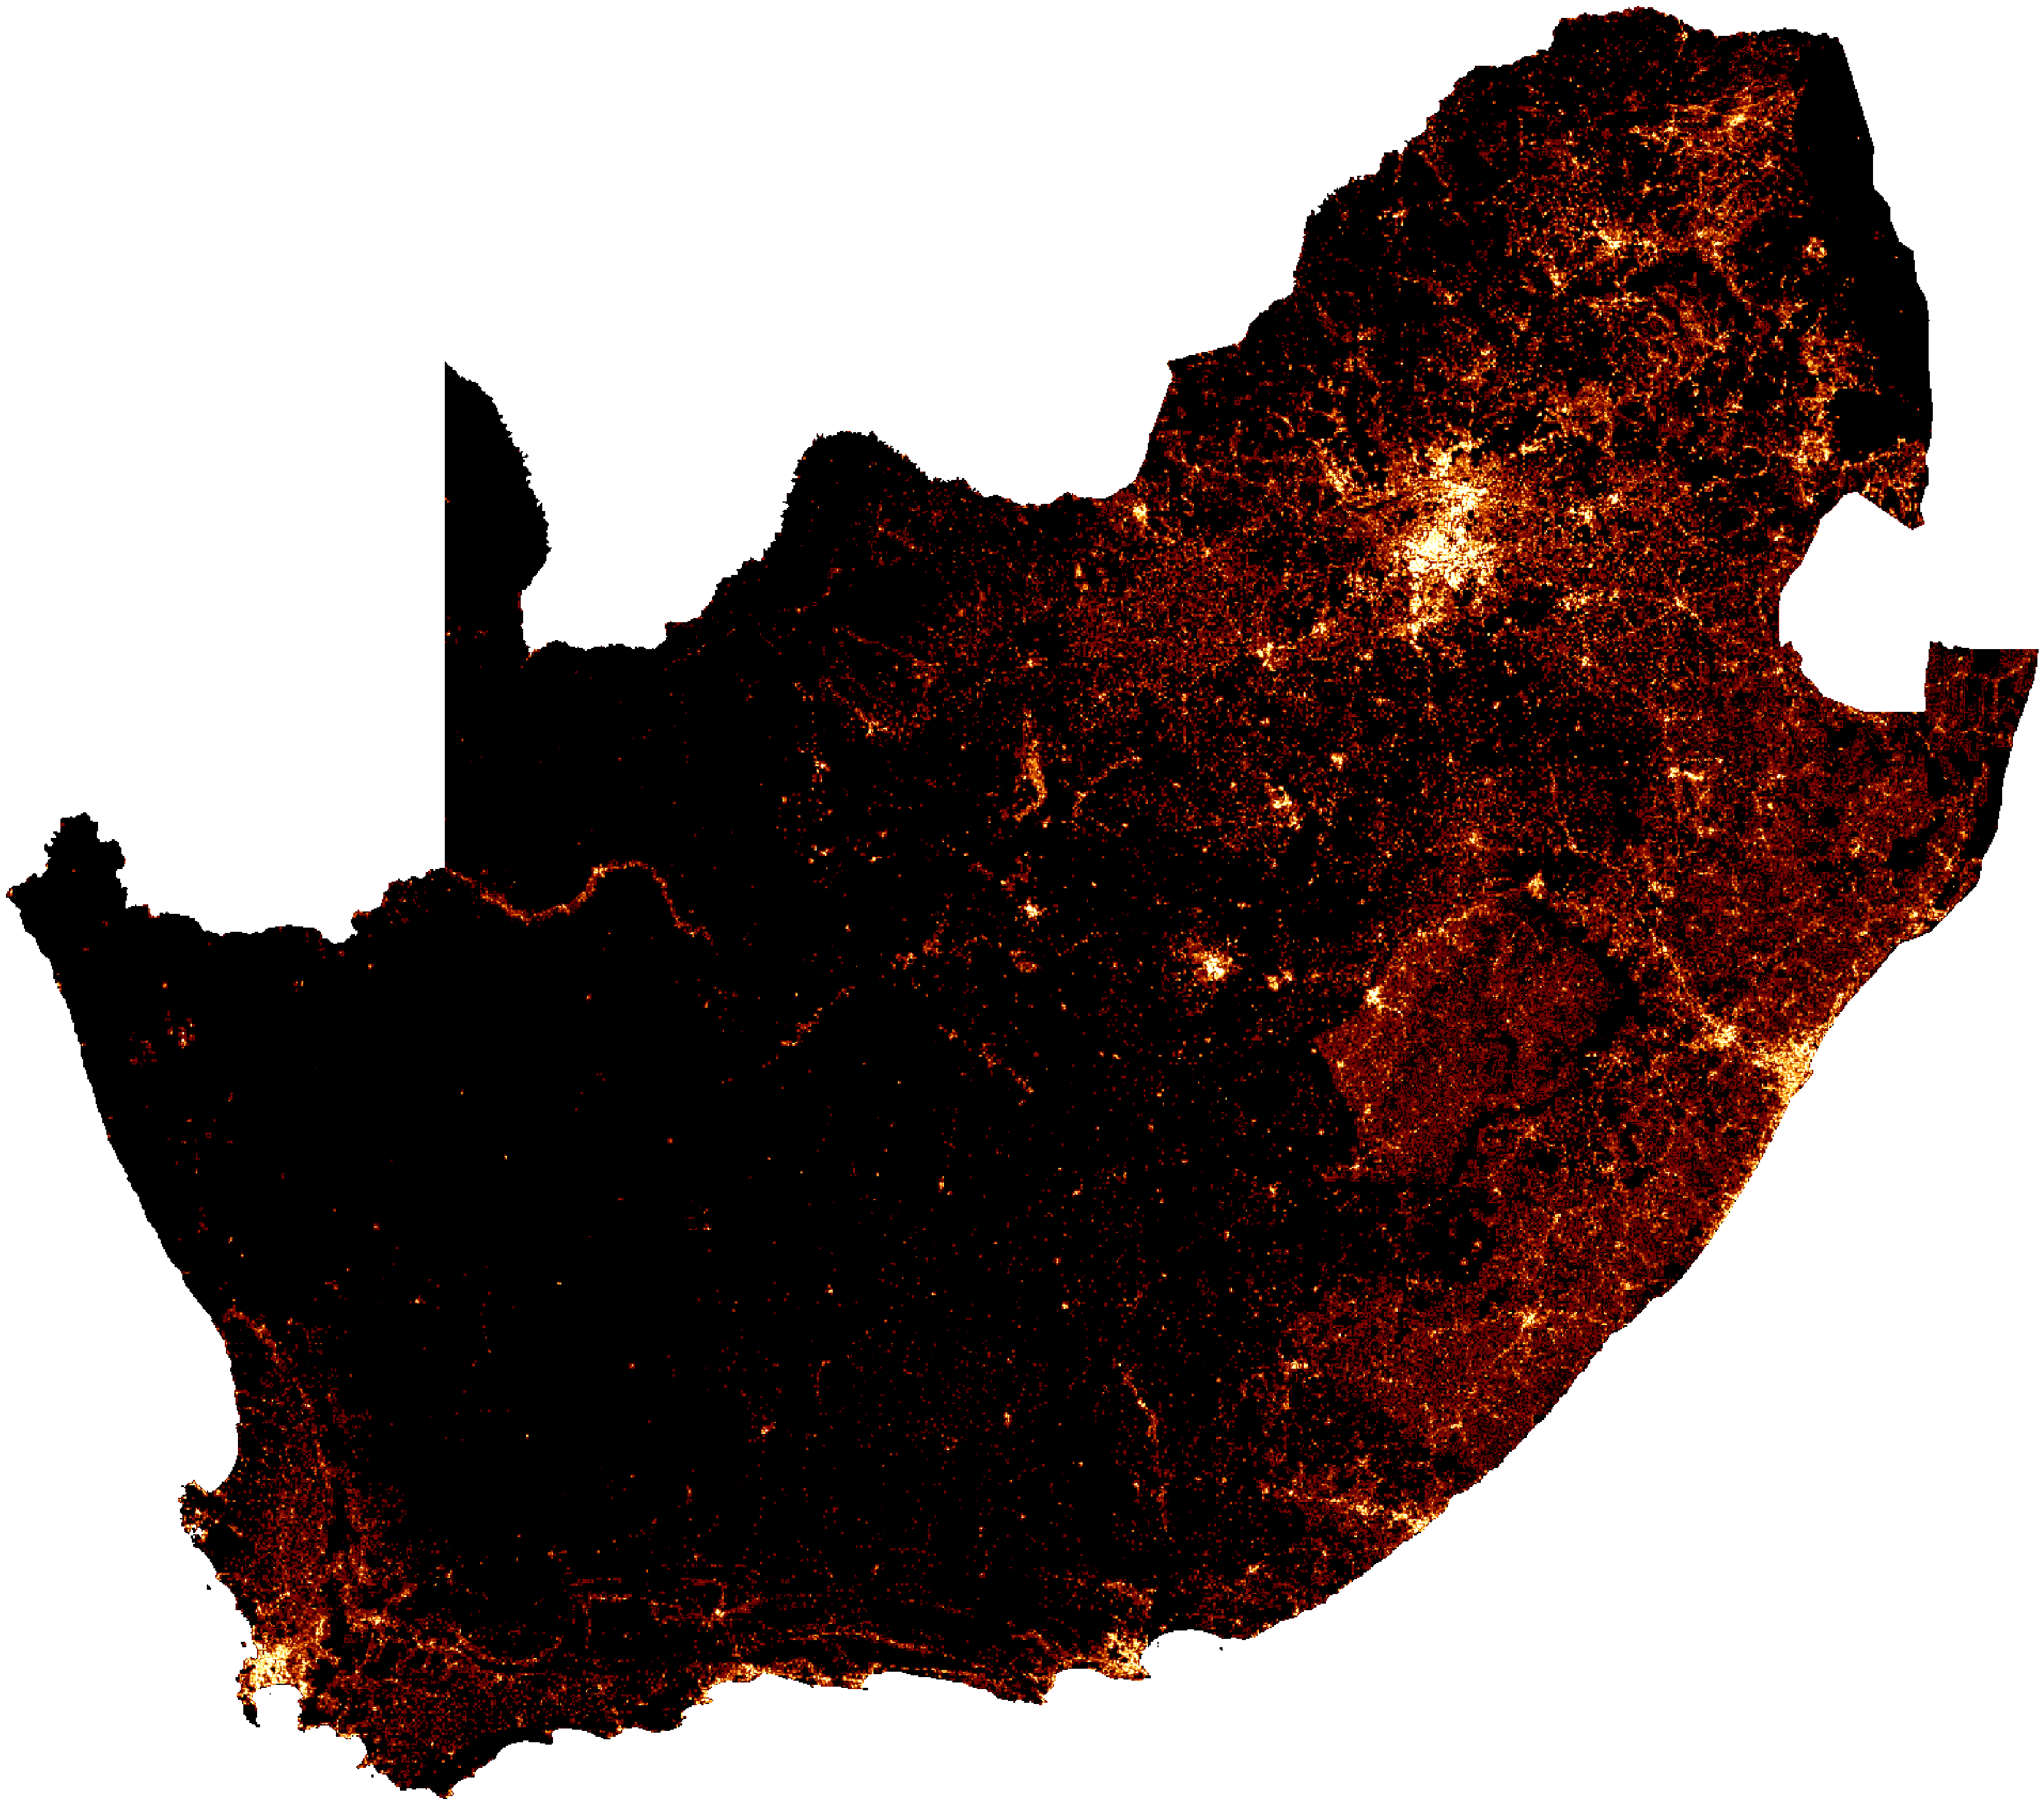

In [6]:
plt.style.use('default')
fig = plt.figure(figsize=(40, 30))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_facecolor('white')
ax.axis('off')
a = ax.imshow(background_gray_SouthAfrica_Lesotho, cmap='gray', vmin=0, vmax=1)
b = ax.imshow(rwi_2plot_SouthAfrica_Lesotho, cmap='afmhot', vmin=-.5, vmax=1.5)
plt.savefig('figure/rwi_in_SouthAfrica_Lesotho.png', dpi=300)

### Figure 3: Model performance

Spatial CV ($R^2$=0.57)
0.571715102770343
0.5727574403707314
Leave-country-out ($R^2$=0.63)
0.6270467985553758
0.6388994369613266
Basic CV ($R^2$=0.72)
0.721993631294269
0.739349465308045


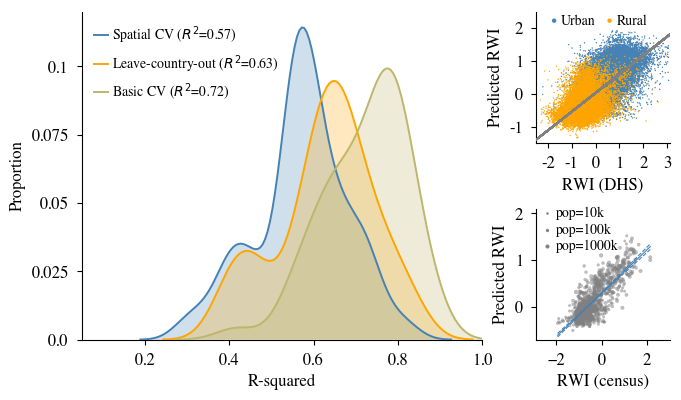

In [7]:
plt.style.use('seaborn-paper')

params = {
    'axes.labelsize': 12,
    'font.size': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': False,
    'grid.color': 'k',
    'grid.linestyle': ':',
    'grid.linewidth': 0.5,
    'font.family': 'serif',
    'font.serif': 'Times'
}
mpl.rcParams.update(params)
height = 4
width =  7

fig, ax = plt.subplots()
fig.subplots_adjust(left=.13, bottom=.15, right=.97, top=.97)
fig.set_size_inches(width, height)
grid = gridspec.GridSpec(2, 2, width_ratios=[3, 1], height_ratios=[1,1])
grid.update(wspace=0.2, hspace=0.5) # set the spacing between axes. 


# ############ figure a ############
ax1 = plt.subplot(grid[:, 0])
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

df_accuracy_cv = pd.read_csv('data/rwi_accuracy_different_cv.csv')

colors = ['steelblue', 'orange', 'darkkhaki']
legend_title = {
    'spatial_cv': u'Spatial CV ($R^2$=0.57)',
    'within_cv': u'Basic CV ($R^2$=0.72)',
    'leave_one_country_out': u'Leave-country-out ($R^2$=0.63)'
}
for idx, i in enumerate(['spatial_cv', 'leave_one_country_out', 'within_cv']):
    _df = df_accuracy_cv[df_accuracy_cv['cv'] == i]
    sns.distplot(_df['r2'], bins=np.arange(0., 1, .025),
                 color=colors[idx], hist_kws={"rwidth":0.75, 'zorder': 4},
                 kde_kws={"shade": True, 'clip': (0.0, 1.0), 'zorder': 4},
                 hist=False, label=legend_title[i])
    print(legend_title[i])
    print(np.mean(_df['r2']))
    print(np.median(_df['r2']))
plt.xlim(0.05, 1)
plt.ylim(0, 4.8)
plt.yticks(np.arange(0, 4.1, 1), ['0.0', '0.025', '0.05', '0.075', '0.1'])
leg = plt.legend(loc=2, fontsize=10, fancybox=False, framealpha=1, handletextpad=0.3, handlelength=1)
leg.get_frame().set_edgecolor('white')
leg.set_zorder(1)
plt.xlabel('R-squared')
plt.ylabel('Proportion')


# ############ figure b ############
ax2 = plt.subplot(grid[0, 1])
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

df_rwi_dhs = pd.read_csv('data/rwi_prediction_dhs.csv', na_filter = False, keep_default_na=True)

colors = ['steelblue', 'orange']
urban_rural_label = {
    'R': 'Rural', 
    'U': 'Urban'
}
for idx, i in enumerate(['U', 'R' ]):
    _df = df_rwi_dhs[df_rwi_dhs['urban_or_rural'] == i]
    plt.scatter(_df.rwi, _df.rwi_prediction, s=1, alpha=1, c=colors[idx], label=urban_rural_label[i], edgecolors='none', zorder=6)
leg = plt.legend(loc=(0.001, 0.85), fontsize=10, frameon=False, fancybox=False, framealpha=1, scatterpoints=1, handletextpad=-.5, ncol=4,borderpad=0.3,columnspacing=0)
leg.get_frame().set_edgecolor('k')
leg.set_zorder(3)
leg.legendHandles[0]._sizes = [10]
leg.legendHandles[1]._sizes = [10]
for lh in leg.legendHandles: 
    lh.set_alpha(1)
slope, intercept, r_value, p_value, std_err = stats.linregress(df_rwi_dhs.rwi, df_rwi_dhs.rwi_prediction)
line = slope*df_rwi_dhs.rwi+intercept

plt.plot(df_rwi_dhs.rwi, line, c='gray', zorder=10)
plt.xlim(-2.5, 3.1)
plt.ylim(-1.5, 2.5)
plt.xticks([-2, -1, 0, 1, 2, 3], [-2, -1, 0, 1, 2, 3])
plt.yticks([-1, 0, 1, 2], [-1, 0, 1, 2])
plt.xlabel('RWI (DHS)')
plt.ylabel('Predicted RWI')


# ############ figure c ############
ax3 = plt.subplot(grid[1, 1])
ax3.yaxis.set_ticks_position('left')
ax3.xaxis.set_ticks_position('bottom')
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

compare = pd.read_csv('data/census_15_countries_validate.csv')
plt.style.use('seaborn-paper')

compare = compare.sort_values(by='rwi')
x = compare['rwi']
y = compare['rwi_weight']
X = sm.add_constant(x)

ols = sm.OLS(y, X).fit()
st, data, ss2 = summary_table(ols, alpha=0.05)
fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T

countries_to_plot = list(set(compare.iso2.unique()))
sc = plt.scatter(compare.rwi, compare.rwi_weight, s=np.log(compare.pop_sum/1000), alpha=.5, c='gray')
plt.scatter(-2.4, 2, s=np.log(1e4/1000), c='gray')
plt.text(-2, 2, 'pop=10k',  verticalalignment='center', fontsize=10)

plt.scatter(-2.4, 1.65, s=np.log(1e5/1000), c='gray')
plt.text(-2, 1.65, 'pop=100k',  verticalalignment='center', fontsize=10)

plt.scatter(-2.4, 1.3, s=np.log(1e6/1000), c='gray')
plt.text(-2, 1.3, 'pop=1000k',  verticalalignment='center', fontsize=10)

regre_color = 'steelblue'
ax3.plot(X.rwi, fittedvalues, color=regre_color, linestyle='-', label='OLS', linewidth=.8)
ax3.plot(X.rwi, predict_mean_ci_low, color=regre_color, linestyle='--', linewidth=.8)
ax3.plot(X.rwi, predict_mean_ci_upp, color=regre_color, linestyle='--', linewidth=.8)
plt.yticks([0, 1, 2], [0, 1, 2])
plt.xlabel('RWI (census)')
plt.ylabel('Predicted RWI')
plt.xlim(-2.9, 3)
plt.ylim(-.7, 2.1)

plt.savefig('figure/model_performance.png', dpi=300, bbox_inches="tight")

### Figure 4: Validation with independently collected PPI data from Kenya

0.3923317179192053
0.5346255891675006
0.7529281560155798


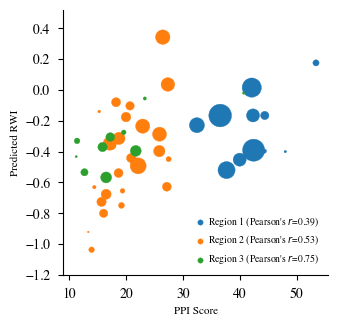

In [8]:
kenya_ppi_rwi = pd.read_csv('data/kenya_ppi_vs_rwi.csv')

plt.style.use('seaborn-paper')

params = {
   'axes.labelsize': 8,
   'font.size': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'grid.color': 'k',
   'grid.linestyle': ':',
   'grid.linewidth': 0.5,
   }
mpl.rcParams.update(params)

width = 3.487
height = width

fig, ax = plt.subplots()
fig.subplots_adjust(left=.20, bottom=.2, right=.96, top=.96)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.set_size_inches(width, height)

for idx, i in enumerate([2,5,6]):
    _df = kenya_ppi_rwi[kenya_ppi_rwi.part_id == i]
    r, p = stats.pearsonr(_df['PPI Score'], _df['rwi'])
    plt.scatter(_df['PPI Score'], _df['rwi'], label='Region '+str(idx+1) + ' (Pearson\'s $r$=' +str(r)[:4] + ')', s=_df['num_household']/2.)
    print(r)
    
plt.xlabel('PPI Score')
plt.ylabel('Predicted RWI')
leg = plt.legend(fontsize=7, fancybox=False, framealpha=1, handletextpad=-.2)
leg.get_frame().set_edgecolor('white')
leg.set_zorder(0)
leg.legendHandles[0]._sizes = [15]
leg.legendHandles[1]._sizes = [15]
leg.legendHandles[2]._sizes = [15]
plt.ylim(-1.2, 0.52)
plt.savefig('figure/kenya_ppi_validation.png', dpi=300, bbox_inches="tight")

### Figure 5a: Estimates of absolute wealth

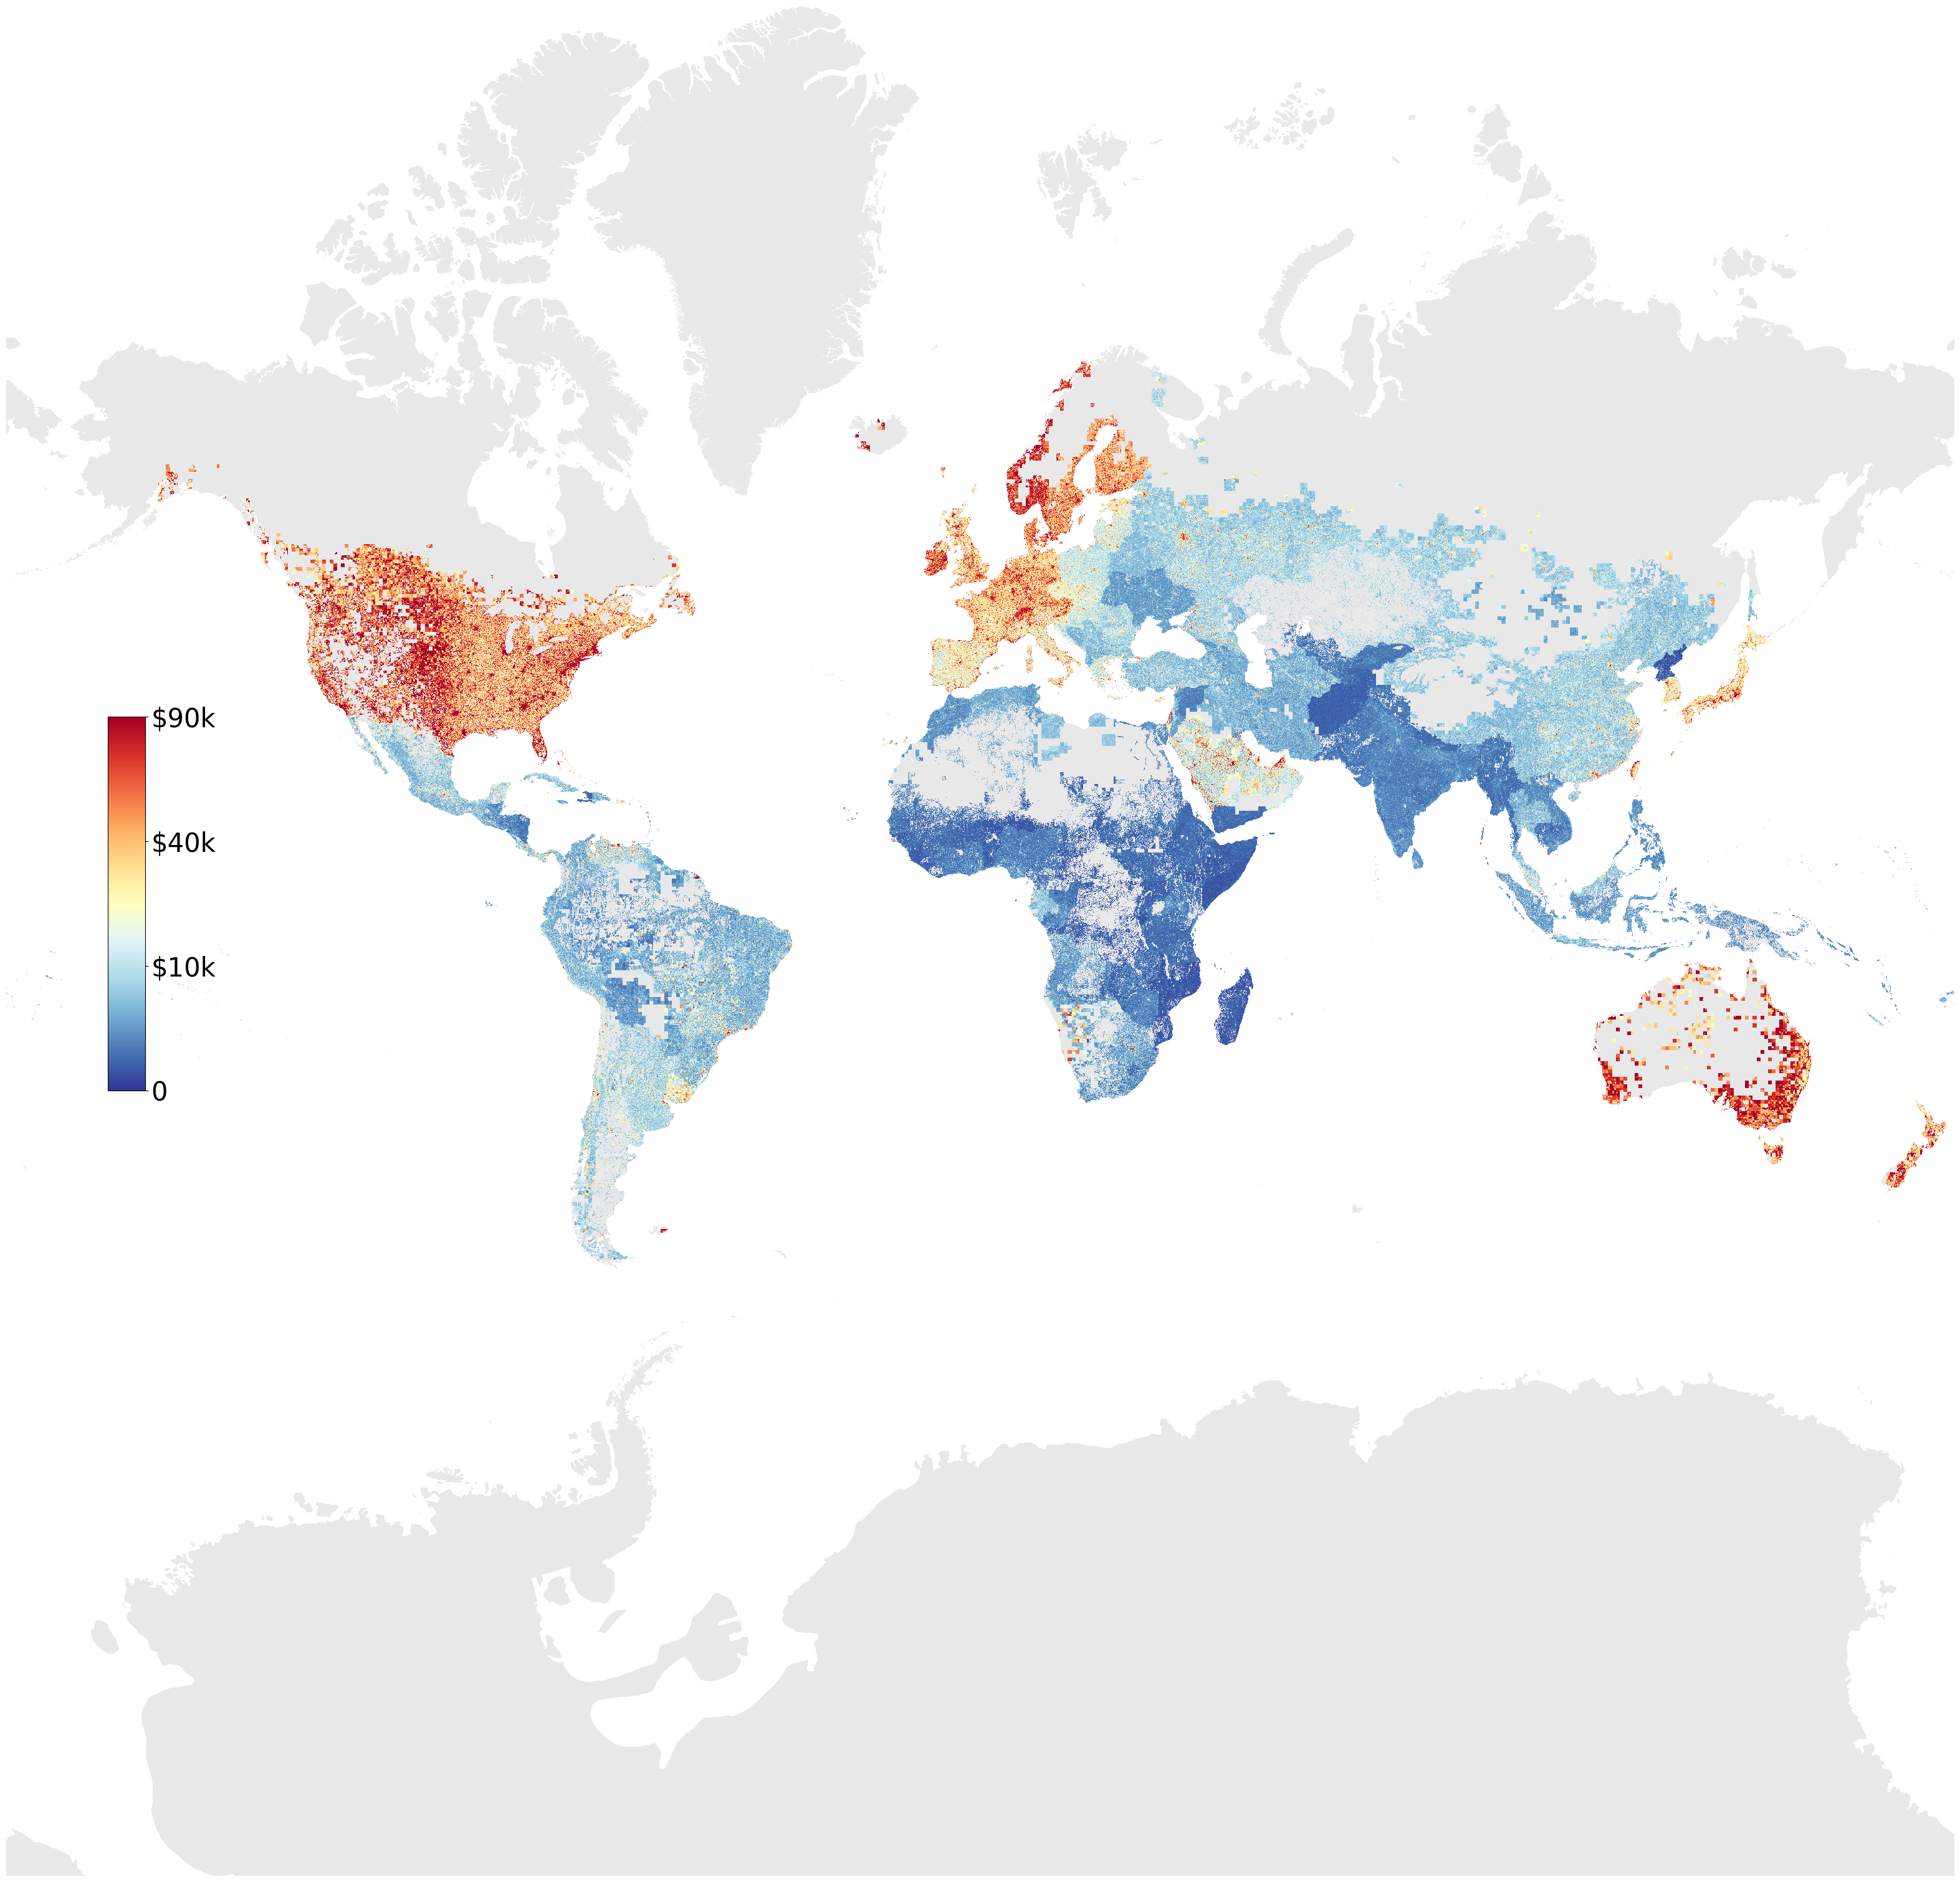

In [9]:
plt.style.use('default')
fig = plt.figure(figsize=(40, 30))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_facecolor('white')
ax.axis('off')
a = ax.imshow(background_gray_global_z14, cmap='gray', vmin=-10, vmax=1)
b = ax.imshow(awe_sqrt_2plot_global_z14, cmap='RdYlBu_r', vmin=0, vmax=300)
cbaxes = fig.add_axes([0.15, 0.42, 0.015, 0.2])
cb = plt.colorbar(b, cax = cbaxes)
cb.set_ticks(range(0, 301, 100))
cb.set_ticklabels(['0', '$10k', '$40k', '$90k'])
cb.ax.tick_params(labelsize=30)
plt.savefig('figure/awe_global.png', dpi=300)

### Figure 5b: Estimates of model error

In [15]:
error_abs = pd.read_csv('data/abs_error.csv')

x_max, x_min = np.max(all_tiles_z14['x']), np.min(all_tiles_z14['x'])
y_max, y_min = np.max(all_tiles_z14['y']), np.min(all_tiles_z14['y'])
print(x_max, x_min)
print(y_max, y_min)

M, N = x_max - x_min + 1, y_max - y_min + 1
rwi_confidence_global_z14_abs = np.empty((N, M,))
rwi_confidence_global_z14_abs[:] = np.NAN

for x, y, confidence in zip(error_abs['bing_tile_x'], 
                            error_abs['bing_tile_y'], 
                            error_abs['error']):
    rwi_confidence_global_z14_abs[y-y_min, x-x_min] = confidence

16383 0
16383 660


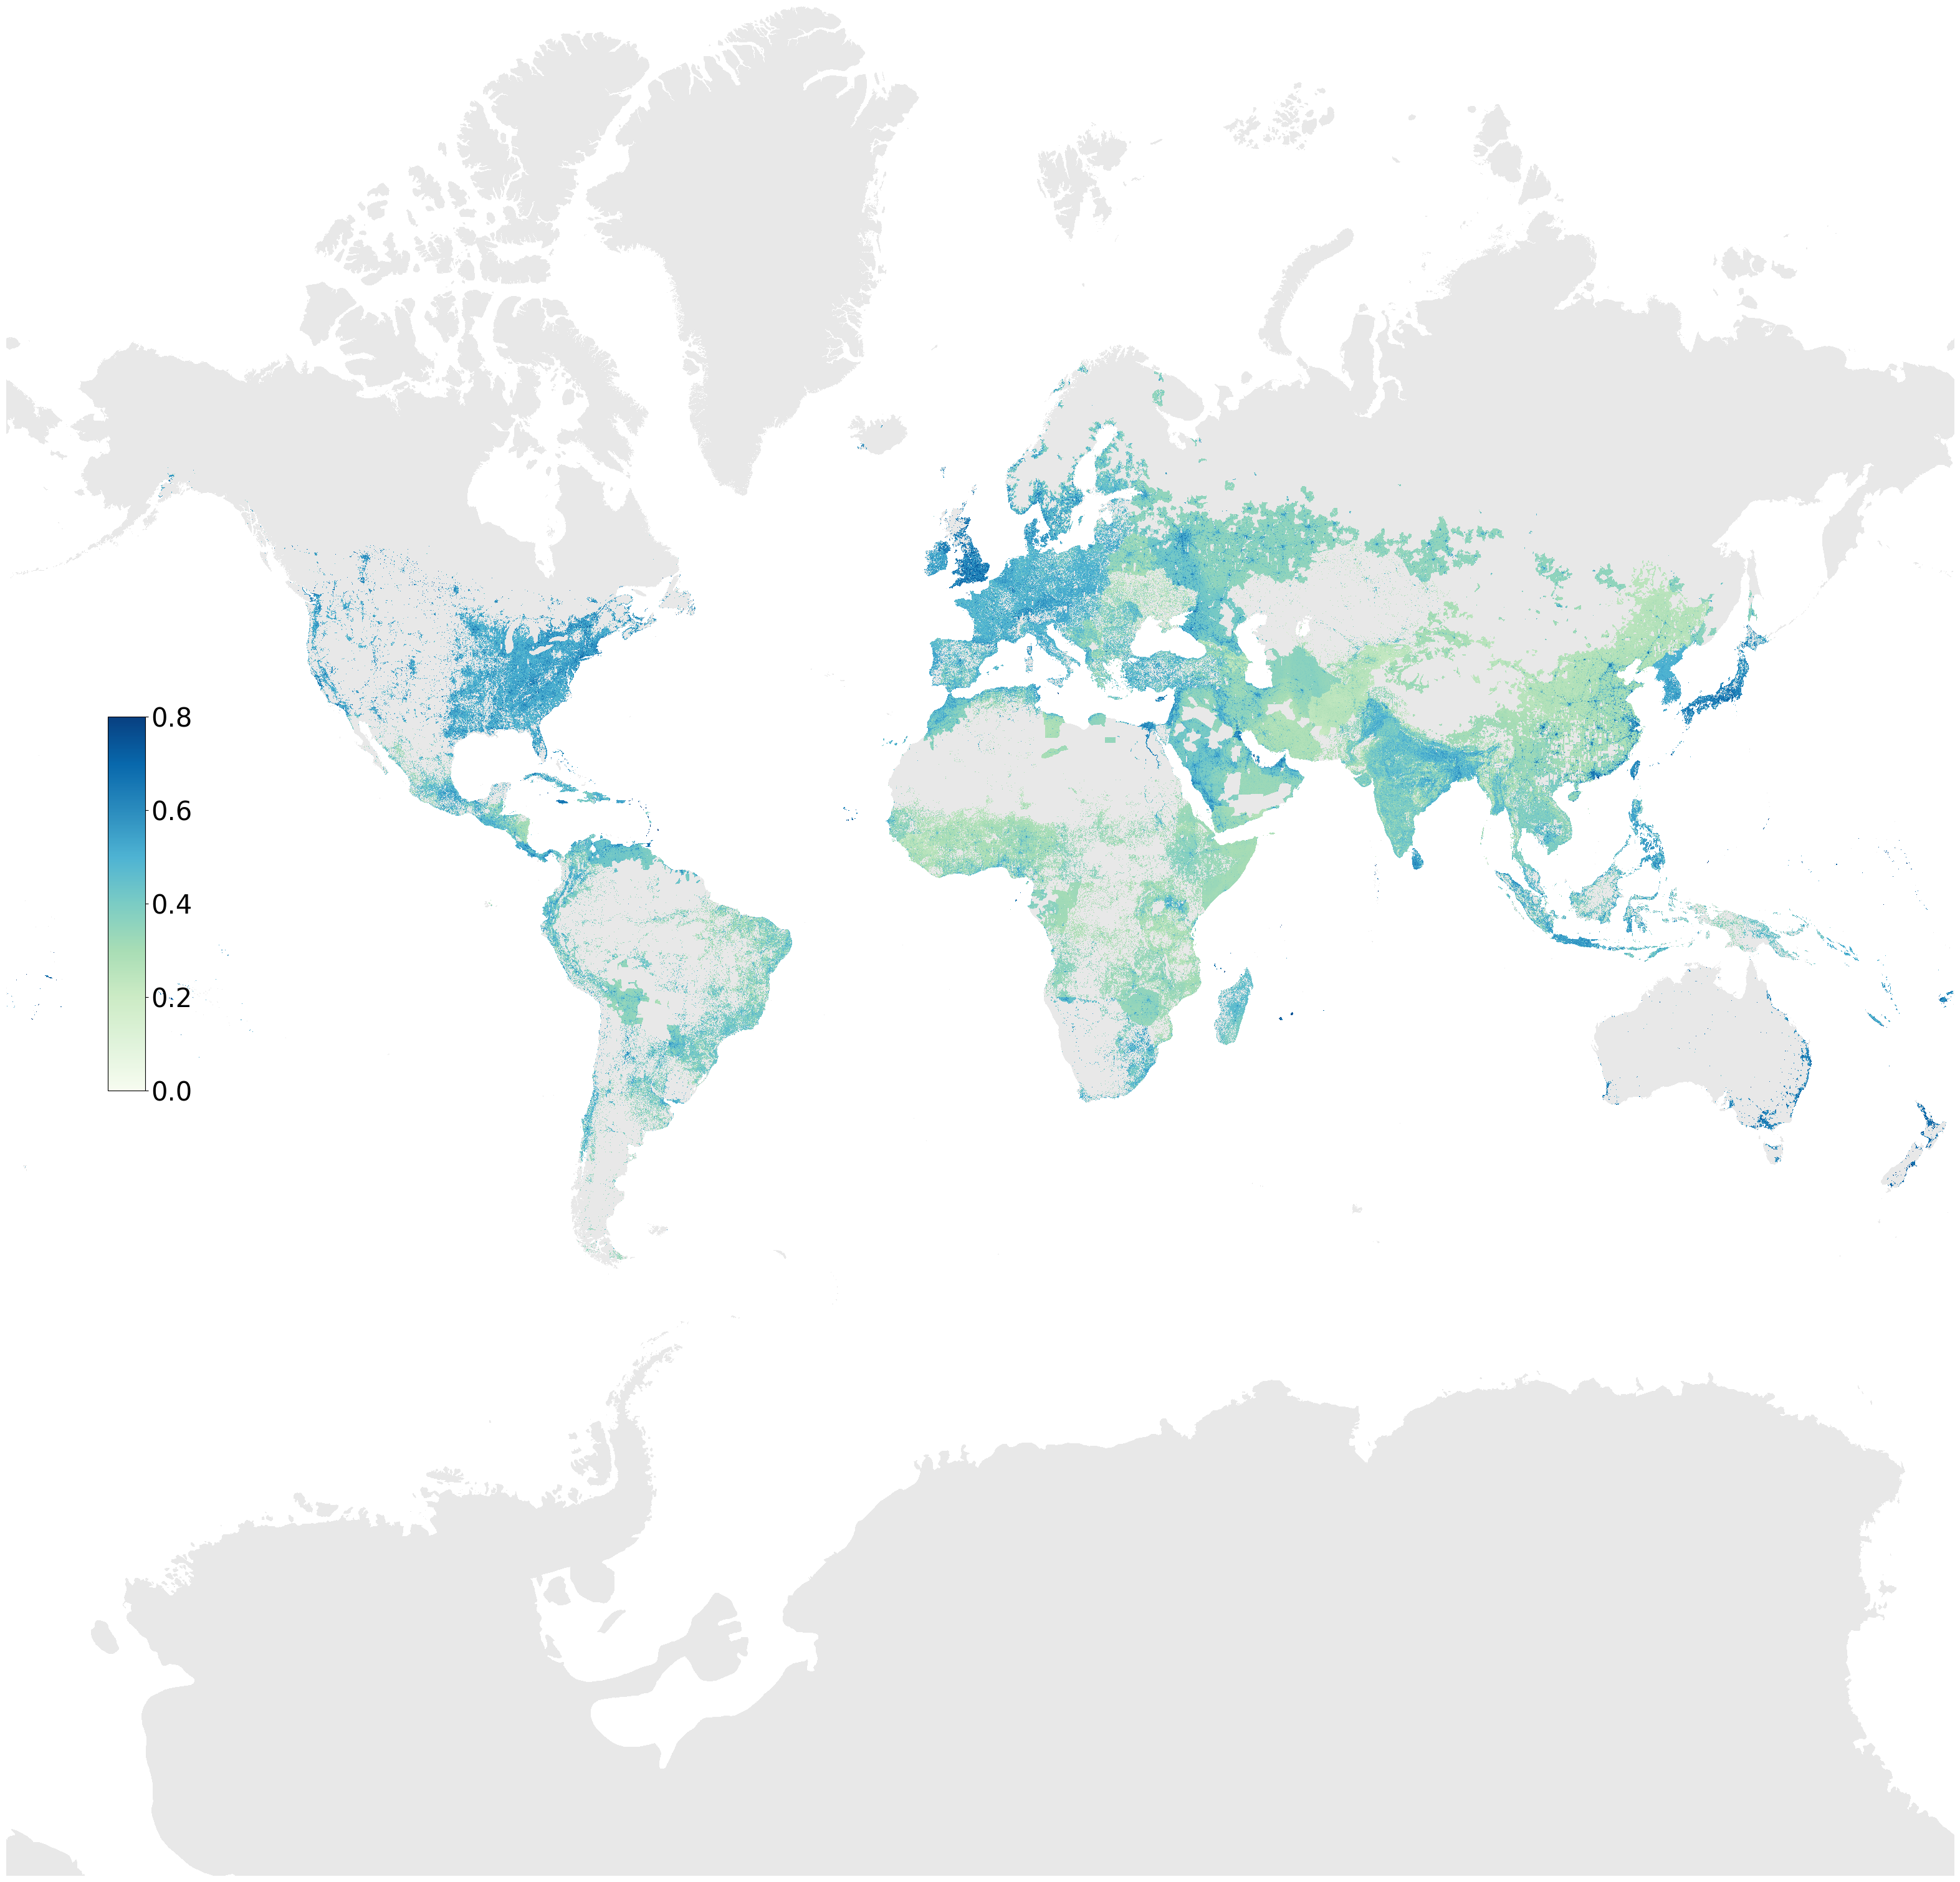

In [16]:
plt.style.use('default')
fig = plt.figure(figsize=(40, 30))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_facecolor('white')
ax.axis('off')
a = ax.imshow(background_gray_global_z14, cmap='gray', vmin=-10, vmax=1)
b = ax.imshow(rwi_confidence_global_z14_abs, cmap='GnBu', vmin=0, vmax=.8)
cbaxes = fig.add_axes([0.15, 0.42, 0.015, 0.2])
cb = plt.colorbar(b, cax = cbaxes)
cb.ax.tick_params(labelsize=30)
plt.savefig('figure/rwi_confidence_error.png', dpi=300)

### Figure S2: Which input data are most useful? 

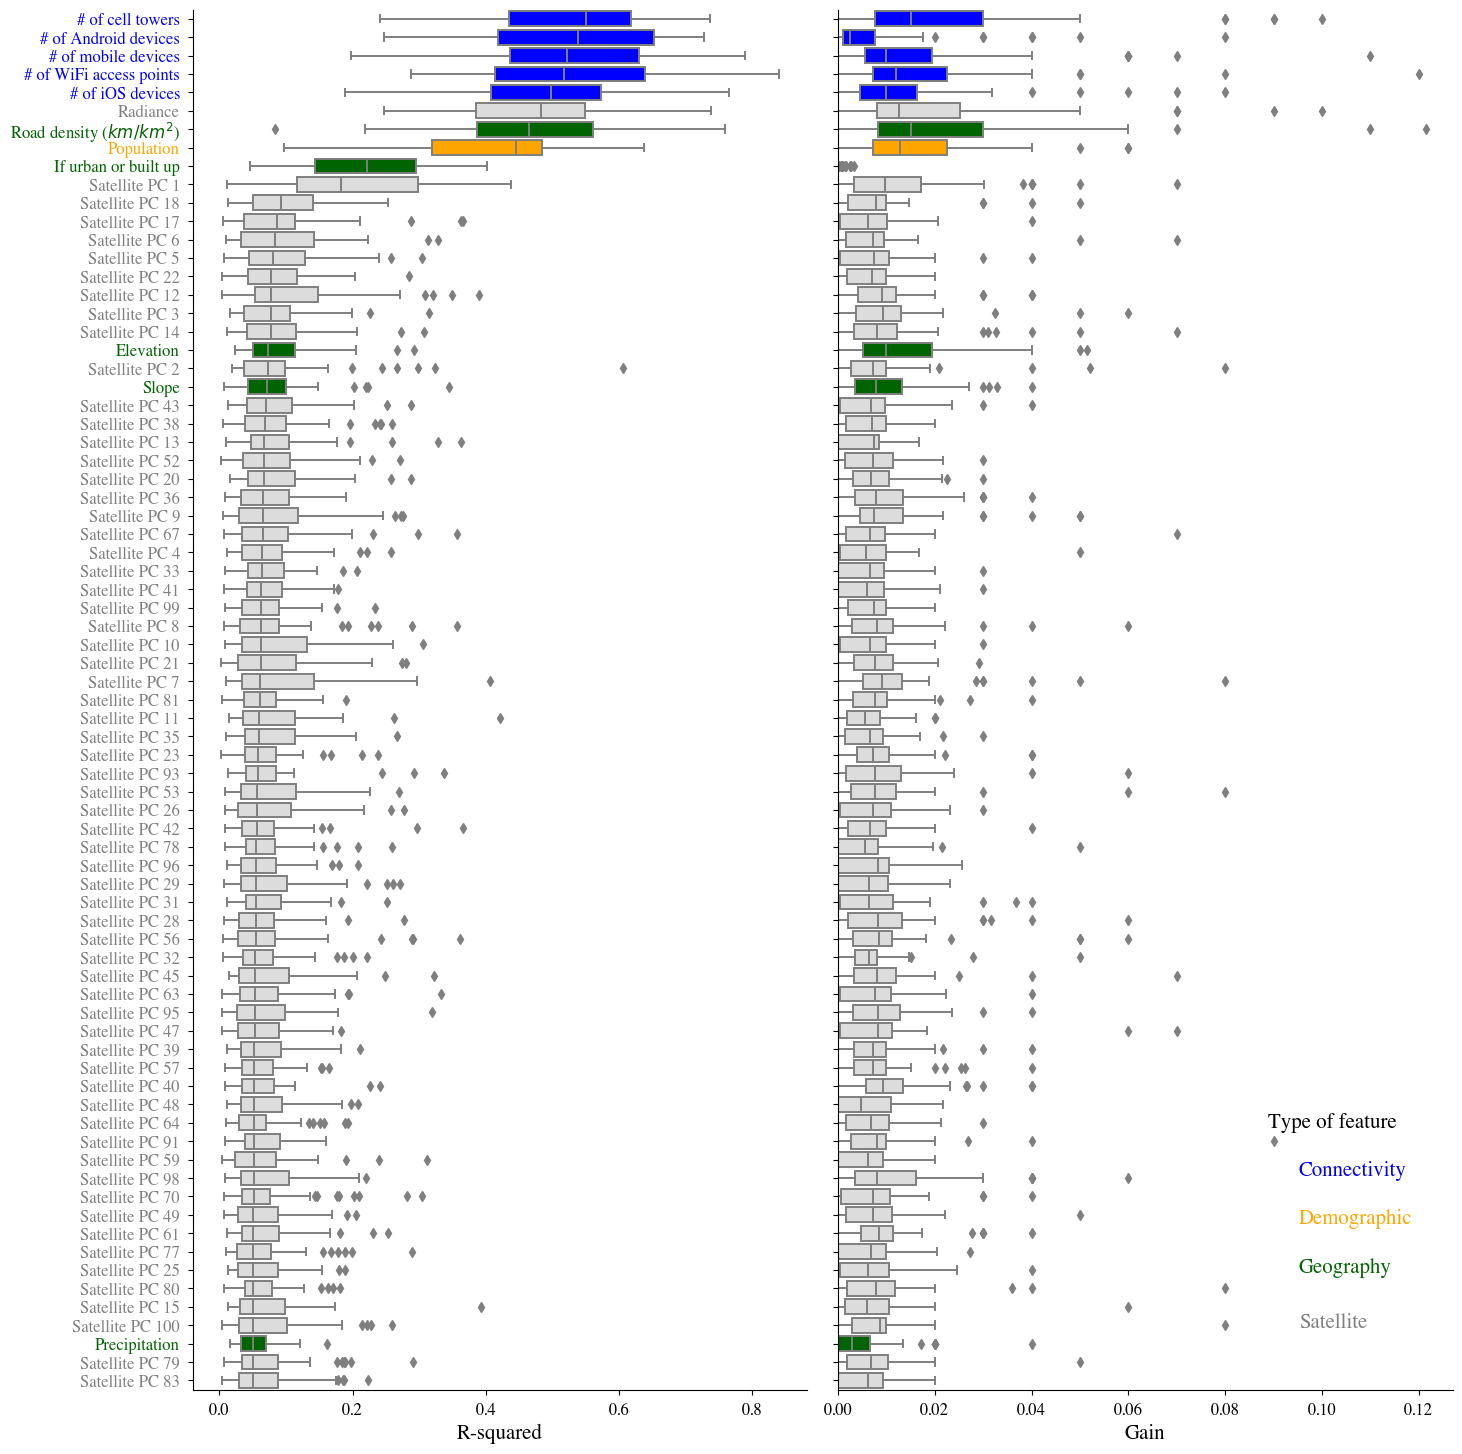

In [17]:
df_feature_importance = pd.read_csv('data/feature_importance.csv')
df_feature_importance.head()

feature_name_dict = {
    'road_density': 'Road density ($km/km^2$)',
    'if_urban_builtup': 'If urban or built up',
    'elevation': 'Elevation',
    'slope': 'Slope',
    'precipitation': 'Precipitation',
    'population': 'Population',
    'cell_tower_count': '# of cell towers',
    'wifi_count': '# of WiFi access points',
    'num_mobile_devices': '# of mobile devices',
    'num_android_devices': '# of Android devices',
    'num_ios_devices': '# of iOS devices',
    'radiance': 'Radiance',
}
for i in range(1, 101):
    feature_name_dict['dg_pca_feature_' + str(i)] = 'Satellite PC ' + str(i)

feature_name_dict_reverse = {}
for i in feature_name_dict:
    feature_name_dict_reverse[feature_name_dict[i]] = i

satellite_color = 'gainsboro'
satellite_color_dark = 'grey'
connectivity_color = 'b'
demography_color = 'orange'
geography_color = 'darkgreen'

feature_color = {
    'road_density': geography_color,
    'if_urban_builtup': geography_color,
    'elevation': geography_color,
    'slope': geography_color,
    'precipitation': geography_color,
    'population': demography_color,
    'cell_tower_count': connectivity_color,
    'wifi_count': connectivity_color,
    'num_mobile_devices': connectivity_color,
    'num_android_devices': connectivity_color,
    'num_ios_devices': connectivity_color,
    'radiance': satellite_color
}
for i in range(1, 101):
    feature_color['dg_pca_feature_' + str(i)] = satellite_color


conn = Image.open('figure/icon/connectivity.png')
conn = np.array(conn).astype(np.float) / 255

demo = Image.open('figure/icon/demography.png')
demo = np.array(demo).astype(np.float) / 255

geo = Image.open('figure/icon/geography.png')
geo = np.array(geo).astype(np.float) / 255

sat = Image.open('figure/icon/satellites.png')
sat = np.array(sat).astype(np.float) / 255

df = df_feature_importance[df_feature_importance.approach == 'one_feature']
df['featuer_old'] = df['feature']
df['feature'] = df.apply(lambda x: feature_name_dict[x['featuer_old']], axis=1)
v_median = df.groupby('feature')['r2'].median().reset_index(name='median')
v_order = v_median.sort_values(by='median', ascending=False)['feature'].tolist()


plt.style.use('seaborn-paper')

params = {
    'axes.labelsize': 15,
    'font.size': 8,
    'legend.fontsize': 10,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': False,
    'grid.color': 'k',
    'grid.linestyle': ':',
    'grid.linewidth': 0.5,
    'font.family': 'serif',
    'font.serif': 'Times'
}
mpl.rcParams.update(params)

height = 15
width =  15

fig, ax = plt.subplots()
fig.subplots_adjust(left=.13, bottom=.05, right=.97, top=.97)

fig.set_size_inches(width, height)
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
gs.update(wspace=0.05) # set the spacing between axes. 

ax1 = plt.subplot(gs[0])
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.grid(axis='y',zorder=1)
fig.set_size_inches(width, height)

top_n = 75
g1 = sns.boxplot(
    y=df[df['feature'].isin(v_order[:top_n])]['feature'], 
    x=df[df['feature'].isin(v_order[:top_n])]['r2'], 
    order=v_order[:top_n], 
    color="lightgray"
)

tick_colors = []
bar_colors = []
for i in v_order:
    bar_colors.append(feature_color[feature_name_dict_reverse[i]])
    if feature_name_dict_reverse[i] in 'radiance' or feature_name_dict_reverse[i][:6] == 'dg_pca':
        tick_colors.append(satellite_color_dark)
    else:
        tick_colors.append(feature_color[feature_name_dict_reverse[i]])
    
for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), tick_colors):
    ticklabel.set_color(tickcolor)

for i, c in zip(range(top_n), bar_colors):
    mybox = g1.artists[i]
    mybox.set_facecolor(c)
    
plt.xlabel('R-squared')
plt.ylabel('')

ax2 = plt.subplot(gs[1])
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

df = df_feature_importance[df_feature_importance.approach == 'xgb_gain']
df['featuer_old'] = df['feature']
df['feature'] = df.apply(lambda x: feature_name_dict[x['featuer_old']], axis=1)
v_median = df.groupby('feature')['importance'].median().reset_index(name='median')

g2 = sns.boxplot(
    y=df[df['feature'].isin(v_order[:top_n])]['feature'], 
    x=df[df['feature'].isin(v_order[:top_n])]['importance'], 
    order=v_order[:top_n],
    color="lightgray"
)

for i, c in zip(range(top_n), bar_colors):
    mybox = g2.artists[i]
    mybox.set_facecolor(c)

fig.figimage(conn, xo=3740, yo=800)
fig.figimage(demo, xo=3740, yo=650)
fig.figimage(geo,  xo=3740, yo=500)
fig.figimage(sat,  xo=3740, yo=350)

ax2.text(0.75, 0.155, 'Connectivity', transform=ax2.transAxes, color=connectivity_color, fontsize=15)
ax2.text(0.75, 0.12, 'Demographic', transform=ax2.transAxes, color=demography_color, fontsize=15)
ax2.text(0.75, 0.085, 'Geography', transform=ax2.transAxes, color=geography_color, fontsize=15)
ax2.text(0.75, 0.045, 'Satellite', transform=ax2.transAxes, color=satellite_color_dark, fontsize=15)
ax2.text(0.7, 0.19, 'Type of feature', transform=ax2.transAxes, color='k', fontsize=15)

plt.xlim(0, 0.127)
plt.xlabel('Gain')
plt.ylabel('')
g2.set(yticklabels=[])

plt.savefig('figure/feature_importance.png', dpi=300)

###  Figure S3: Geographic generalizability of wealth predictions

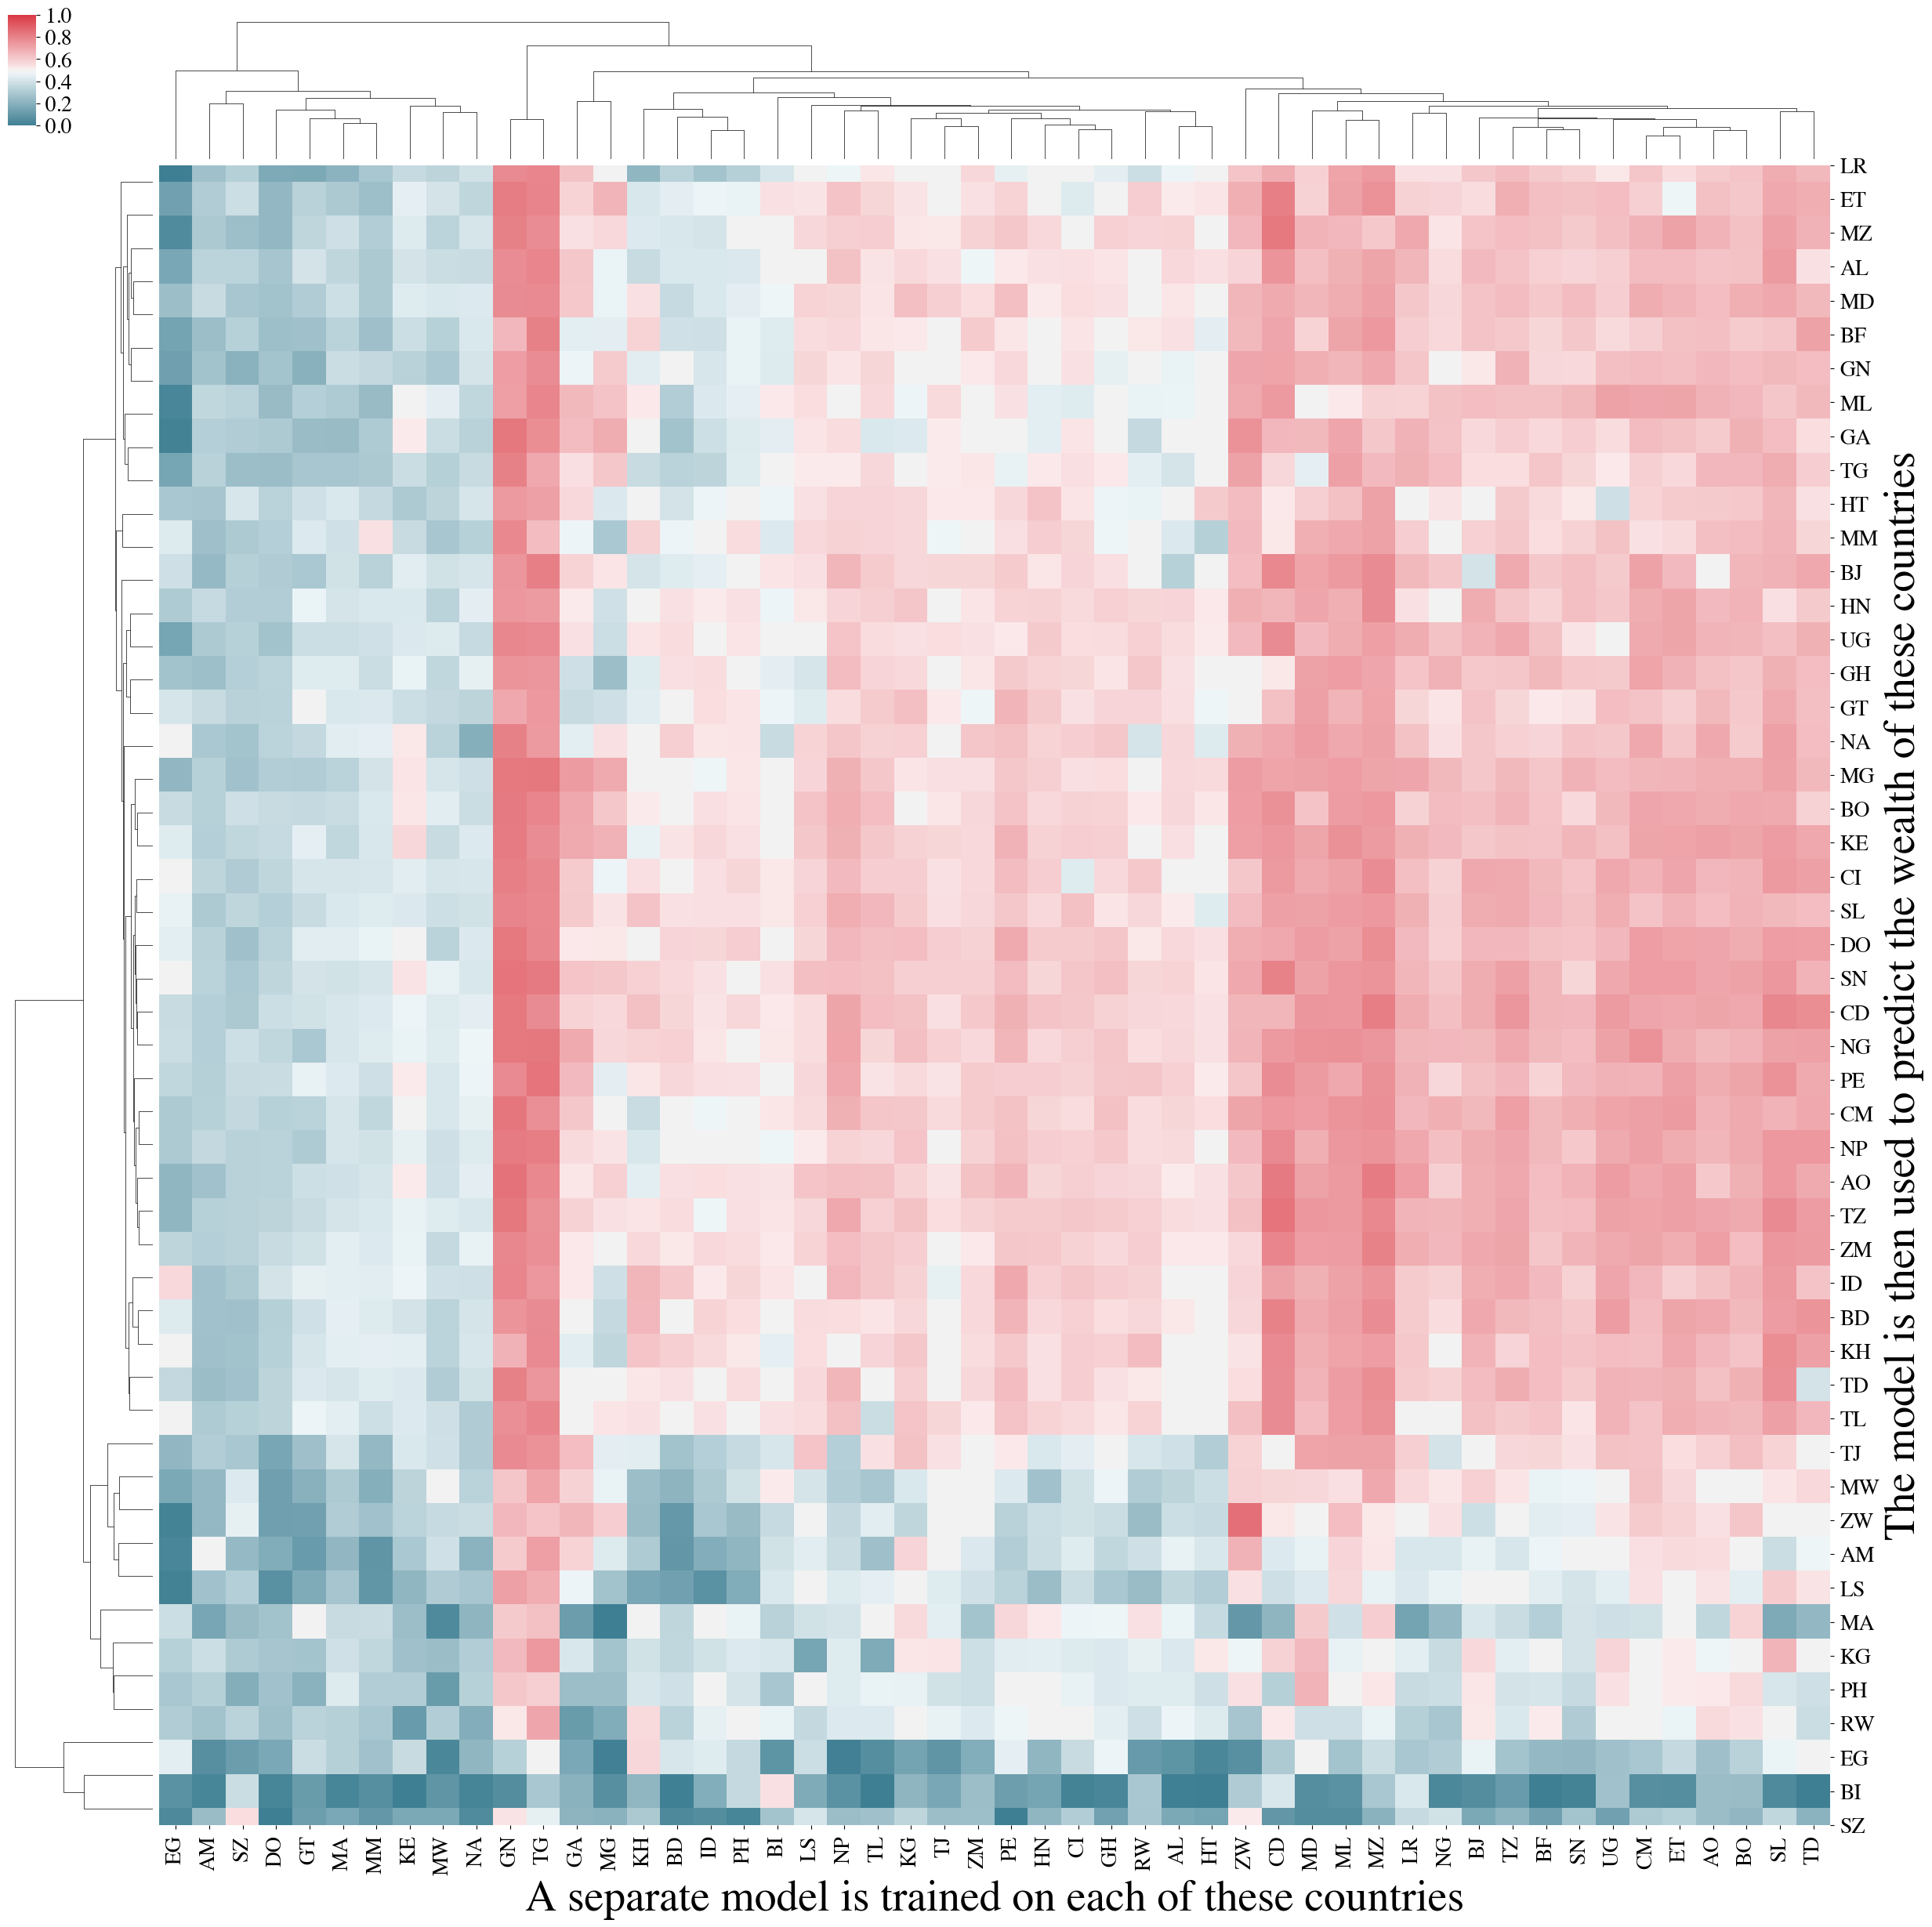

In [18]:
df_transferability = pd.read_csv('data/model_transferability_r2.csv', index_col=0, na_filter = False, keep_default_na=True)

plt.style.use('seaborn-paper')

params = {
    'axes.labelsize': 20,
    'font.size': 20,
    'legend.fontsize': 10,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'text.usetex': False,
    'grid.color': 'k',
    'grid.linestyle': ':',
    'grid.linewidth': 0.5,
    'font.family': 'serif',
    'font.serif': 'Times'
   }
mpl.rcParams.update(params)

width = 3.487
height = width

cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.clustermap(df_transferability, cmap=cmap, vmin=0, vmax=1, center=0.5, figsize=(30, 30))
ax = g.ax_heatmap
ax.set_xlabel("A separate model is trained on each of these countries", fontsize=40)
ax.set_ylabel("The model is then used to predict the wealth of these countries", fontsize=40)
plt.savefig('figure/model_transferability_r2.png', dpi=300, bbox_inches="tight")

### Figure S4: Models perform better on countries with similar characteristics

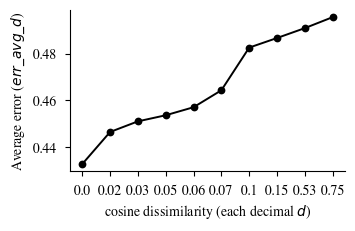

In [19]:
error_distance = pd.read_csv('data/error_estimation_error_vs_distance_decimal.csv')
distance_decimals = [float(i) for i in error_distance.columns]
error = []
for i in error_distance.columns:
    error.append(np.mean(error_distance[i]))

plt.style.use('seaborn-paper')

params = {
    'axes.labelsize': 10,
    'font.size': 10,
    'legend.fontsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'text.usetex': False,
    'grid.color': 'k',
    'grid.linestyle': ':',
    'grid.linewidth': 0.5,
    'font.family': 'serif',
    'font.serif': 'Times'
   }
mpl.rcParams.update(params)

width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.18, bottom=.22, right=.97, top=.97)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.set_size_inches(width, height)
plt.plot(range(10), error, '-o', color='k')
plt.xticks(range(10), [str(i) for i in distance_decimals])
plt.xlabel('cosine dissimilarity (each decimal $d$)')
plt.ylabel('Average error ($err\_avg\_d$)')
plt.savefig('figure/confidence_similarity.png', dpi=300, bbox_inches="tight")

### Figure S5

All input data ($R^2$ = 0.57)
0.571715102770343
0.5727574403707314
All, excluding satellite ($R^2$ = 0.55)
0.5487570606221618
0.5394737655303802
Satellite only ($R^2$ = 0.39)
0.3864643134608198
0.38427486735455046


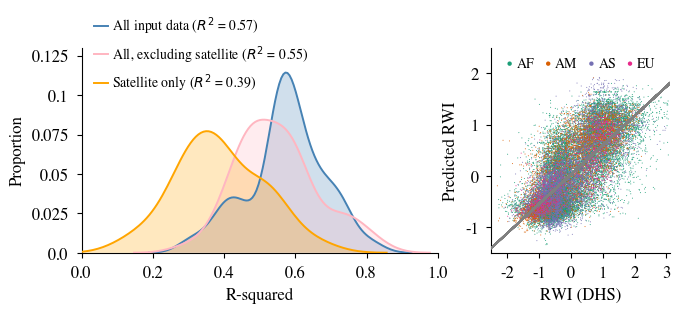

In [26]:
plt.style.use('seaborn-paper')

params = {
    'axes.labelsize': 12,
    'font.size': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': False,
    'grid.color': 'k',
    'grid.linestyle': ':',
    'grid.linewidth': 0.5,
    'font.family': 'serif',
    'font.serif': 'Times'
   }
mpl.rcParams.update(params)

height = 2.5
width =  7

fig, ax = plt.subplots()
fig.subplots_adjust(left=.13, bottom=.15, right=.97, top=.97)

fig.set_size_inches(width, height)
grid = gridspec.GridSpec(1, 2, width_ratios=[2, 1])
grid.update(wspace=0.2) # set the spacing between axes. 


# ############ figure a ############
ax1 = plt.subplot(grid[0, 0])
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

df = pd.read_csv('data/rwi_accuracy_spatial_cv_different_features.csv')
colors = ['steelblue', 'lightpink', 'orange']
legend_title = {'xgb_geo_fb_satellite_pca_100': u'All input data ($R^2$ = 0.57)',
                'xgb_geo_fb_no_satellite': u'All, excluding satellite ($R^2$ = 0.55)',
                'xgb_satellite_pca_100': u'Satellite only ($R^2$ = 0.39)'}
for idx, i in enumerate(legend_title.keys()):
    _df = df[df['approach'] == i]
    sns.distplot(_df['r2'], bins=np.arange(0., 1, .025),
                 color=colors[idx], hist_kws={"rwidth":0.75},
                 kde_kws={"shade": True, 'clip': (0.0, 1.0), 'zorder':3},
                 hist=False, label=legend_title[i],
                )
    print(legend_title[i])
    print(np.mean(_df['r2']))
    print(np.median(_df['r2']))
plt.yticks(np.arange(0, 5.1, 1), ['0.0', '0.025', '0.05', '0.075', '0.1', '0.125'])

plt.xlim(0, 1)
plt.ylim(0, 5.2)
leg = plt.legend(loc=(0.02, 0.75), fontsize=10, frameon=False, handletextpad=0.3, handlelength=1, fancybox=False, framealpha=1)
leg.get_frame().set_edgecolor('k')
leg.set_zorder(3)
plt.xlabel('R-squared')
plt.ylabel('Proportion')


# ############ figure b ############
ax2 = plt.subplot(grid[0, 1])
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

df = pd.read_csv('data/rwi_prediction_dhs.csv', na_filter = False, keep_default_na=True)

continent_label = {
    'africa': 'AF', 
    'americas': 'AM', 
    'asia': 'AS', 
    'europe': 'EU'
}
colors = [
'#1b9e77',
'#d95f02',
'#7570b3',
'#e7298a',
]
for idx, i in enumerate(['africa', 'americas', 'asia', 'europe']):
    _df = df[df[i] == 1]
    plt.scatter(_df.rwi, _df.rwi_prediction, s=.5, alpha=1, label=continent_label[i], c=colors[idx], edgecolors='none', zorder=4)
leg = plt.legend(loc=(0.001, 0.87), fontsize=10, frameon=False, fancybox=False, framealpha=1, scatterpoints=1, handletextpad=-.5, ncol=4,borderpad=0.3,columnspacing=0)
leg.get_frame().set_edgecolor('k')
leg.set_zorder(3)
leg.legendHandles[0]._sizes = [10]
leg.legendHandles[1]._sizes = [10]
leg.legendHandles[2]._sizes = [10]
leg.legendHandles[3]._sizes = [10]
for lh in leg.legendHandles: 
    lh.set_alpha(1)
slope, intercept, r_value, p_value, std_err = stats.linregress(df.rwi, df.rwi_prediction)
line = slope*df.rwi+intercept

plt.plot(df.rwi, line, c='gray', zorder=7)
plt.xlim(-2.5, 3.1)
plt.ylim(-1.5, 2.5)
plt.xticks([-2, -1, 0, 1, 2, 3], [-2, -1, 0, 1, 2, 3])
plt.yticks([-1, 0, 1, 2], [-1, 0, 1, 2])

plt.xlabel('RWI (DHS)')
plt.ylabel('Predicted RWI')
plt.savefig('figure/model_performance_supplementary.png', dpi=300, bbox_inches="tight")

### Figure S6: The global income and GDP distribution

(101, 2)


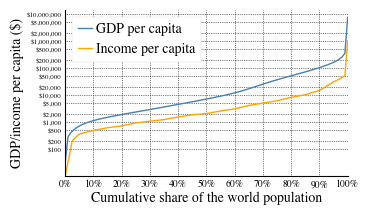

In [27]:
awe_pop = pd.read_csv('data/awe_pop_cdf.csv')
print(awe_pop.shape)

income_2013 = [
    [0,10],
    [0.025,200],
    [0.05,350],
    [0.1,480],
    [0.15,600],
    [0.2,700],
    [0.25,900],
    [0.30,1050],
    [0.35,1200],
    [0.4,1500],
    [0.45,1800],
    [0.5,2010],
    [0.55,2500],
    [0.60,3000],
    [0.65,4000],
    [0.70,4900],
    [0.75,6000],
    [0.8,8000],
    [0.85,10000],
    [0.9,14500],
    [0.95,30000],
    [0.975, 40000],
    [0.99, 50000],
    [1.0,1000000]
]

income_2013_df = pd.DataFrame({'pct': [i[0] for i in income_2013], 'income': [i[1] for i in income_2013]})
income_2013_df.head()

plt.style.use('seaborn-paper')

params = {
    'axes.labelsize': 10,
    'font.size': 10,
    'legend.fontsize': 10,
    'xtick.labelsize': 7,
    'ytick.labelsize': 5,
    'text.usetex': False,
    'grid.color': 'k',
    'grid.linestyle': ':',
    'grid.linewidth': 0.5,
    'font.family': 'serif',
    'font.serif': 'Times'
   }
mpl.rcParams.update(params)

width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.16, bottom=.2, right=.97, top=.97)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid()
fig.set_size_inches(width, height)
plt.plot(awe_pop.pop_pct, awe_pop.awe, c='steelblue', linewidth=1, label='GDP per capita')
plt.plot(income_2013_df.pct, income_2013_df.income, c='orange', linewidth=1, label='Income per capita')
plt.legend(fontsize=10, fancybox=False, framealpha=1, handletextpad=0.3, handlelength=1)
plt.yscale('log')
plt.xlabel('Cumulative share of the world population',labelpad=2)
plt.ylabel('GDP/income per capita ($)',labelpad=2)
plt.xticks(np.arange(0, 1.01, .1), ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.yticks([100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000, 2e6,5e6, 1e7], 
           ['$100', '$200', '$500', '$1,000', '$2,000', '$5,000', '$10,000', '$20,000', '$50,000', '$100,000', '$200,000', '$500,000', '$1,000,000', '$2,000,000', '$5,000,000', '$10,000,000'])
plt.xlim(0, 1)
plt.ylim(10, 1.4e7)
plt.minorticks_off()
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
ax.tick_params(axis='both', which='major', pad=-1)
plt.savefig('figure/poverty_line.png', dpi=300, bbox_inches="tight")